<a href="https://colab.research.google.com/github/BrindusaGheorghe/helicopter_escapes/blob/main/Project_Analytical_Thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Analytical Thinking

---
## The question:
<br />
Is there a shortage of affordable appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods?
<br />
<br />

## The dataset:
<br />

We have access to data taken from the website [immobilienscout24.de](https://www.immobilienscout24.de/).

It is a list of rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns.

* **Region:** the Berlin district, where the flat is located

* **Condition:** the condition of the flat

* **Rooms:** the number of rooms the flat has

* **Rent:** monthly rent for the flat

* **Year_Construction:** the year in which the house was build

* **Space:** how many square meters does the flat have

<br />

This dataset is a **snapshot** of the marketplace, and we have no access to the time dimension in it.




In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the dataset
immoscout_rents = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
immoscout_rents.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


## **Is there a shortage of affordable appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods?**
---

In order to properly answer this question, we first need to define two terms.
<br />
<br />
a. What does "**affordable**" mean?

b. What is a "**shortage**"?
<br />
<br />
I will now look at these concepts one by one.
<br />
<br />


### Affordability - general definition
---
The first thing I would consider is what exactly does "affordable" mean? If we were somehow required to use only the current dataset, we could conclude that all the rents under the average are affordable. However, I will attempt to find the answer elsewhere as we have no such constraints.
<br />
<br />
First, “[affordable](https://www.dictionary.com/browse/affordable)” simply means “within one’s financial means”. But in the case of accommodation, I take “affordable” to mean “rent that most people would be able to pay, in the limit of a maximum of 30% of their monthly income”. I also think it would be helpful to look at the minimum and average wage in Berlin before I decide on the final affordability value that I will be using.
<br />
<br />
### Average and typical salary
---
For the purposes of this analysis, I am assuming that anyone with an average income or lower should be able to afford an “affordable” rent. I would have preferred to use a median value, instead of an average, for a more precise analysis, but I was not able to find a comprehensive report on all the incomes in Berlin. It would be really interesting to look at all the incomes in Berlin, and see where most of the incomes actually lie. However, all the reports I could find only looked at a [general “average” salary](https://www.averagesalarysurvey.com/berlin-germany?SalaryType=2) for the city, and then at [specific averages for each type of job](https://www.payscale.com/research/DE/Location=Berlin-Berlin/Salary). For the rest of the analysis I will use the "[most typical salary](https://www.averagesalarysurvey.com/berlin-germany?SalaryType=2)" as it seems to be closer to what a median value would be.
<br />
<br />
The most typical yearly salary of 34.020 euros means a monthly salary of 2.835 euros. 30% of that (the maximum percentage available for rent) is about **940 euros**. The working hypothesis is that we should use this value as our “affordable” value. 
<br />
<br />
### Low-wage income
---
But how about the minimum salary? [The minimum wage in Germany in 2022](https://www.destatis.de/EN/Themes/Labour/Earnings/Minimum-Wages/_node.html) is 9,82 euros per hour, which adds up to a monthly salary of 1.621 euros, brut. [Calculating the net salary](https://www.brutto-netto-rechner.info/gehalt/gross_net_calculator_germany.php), it comes down to 1.213,45 euros a month.  For a minimum wage earner, the affordable rent, which should be a maximum of 30% of the net income, comes to around **400 euros**. 
<br />
<br />
As far as low-wage jobs in general, I couldn’t find a very recent statistic that could tell me how many people in Berlin are working in such jobs. However, in 2018 there were reportedly [8 million low-wage workers in Germany](https://www.destatis.de/EN/Press/2020/10/PE20_416_623.html;jsessionid=E8071CDC6A5DC61EB19126C019D707D7.live732) (that includes minimum wage and a little higher, until the median value of 16,59 euros per hour). This accounts for 21% of all employees. 
<br />
<br />
I am taking this most recent proportion and applying it to Berlin as well, and as such, I am assuming that about 20% of the employees in Berlin have low-wage jobs. According to a more recent report,[ Berlin had about 2 million employees in 2021](https://www.businesslocationcenter.de/en/labor-market/workforce-potential/employed#:~:text=In%202021%2C%20the%20number%20of,increase%20of%20all%20federal%20states.). That means approximately **400,000 employees in Berlin have low-wage jobs**. That doesn’t mean, however, that Berlin needs exactly 400,000 affordable apartments. After all, some low-wage employees might share accommodation, as part of a couple, or in a WG. Also, this number doesn’t take into account the [unemployed](https://www.berlin.de/en/news/7478082-5559700-umeployment-rate-falls-8-percent.en.html) (176,717 people in April 2022) and the pensioners who also need affordable accommodation. I do not have the exact number of pensioners in Berlin, we only seem to know that about [20% of them are at risk of poverty](https://www.dw.com/en/rising-poverty-among-germanys-elderly/a-51942120) and need to keep working to make ends meet. 
<br />
<br />
### How many people in Berlin need cheap accommodation?
---
I think an estimate of the total number of people needing cheap accommodation could be useful to perceive the magnitude of the problem. I will round up the unemployed to 200,000 and add another 200,000 to account for pensioners and any other at-risk groups that I didn’t already add. Adding the low-wage earners, that would make a very rough estimation of about **800,000 people in Berlin who could need cheap accommodation**. Of course, some of them are already helped by programs such as WBS, Wohngeld, and senior accommodation. And it is reasonable to assume that if they already found affordable accommodation, that unit will not be on the market for quite some time, possibly a few years. This, in turn, will affect the availability of affordable rents on the market. 
<br />
<br />
Seeing the complexity of situations that would require cheap accommodation and the sheer number of people that could use it, I don’t think it’s sensible to continue assuming that I should base the “affordable” value on the most typical income. Instead, I will use 3 affordability indicators.
<br />
<br />
### Affordability indicators
---
First, **affordable_low will be 400 euros**, to account for the minimum wage earners. Second, **affordable_high will be 940 euros**, which should be an affordable rent for the most typical Berlin earner. Third, **affordable_average is 670 euros**, the average of the other two affordability values, and it should serve as an affordability guide for anyone with an income more than the minimum, but less than the typical. As I am assuming that most people are in this last category, **I will use the value of *670 euros* as the general value for “affordable”**, with the understanding that the people who earn too little to afford it will have to use programs like WBS and Wohngeld to help pay for their accommodation.
<br />
<br />
As the [average square meter per person](https://www.destatis.de/EN/Themes/Society-Environment/Housing/_node.html) was around 47 m2 in 2021, let's use the value of ***14.25 euros/sqm*** as the affordability threshold for our data. Please note that this is already much higher than what was considered the ["average" price in 2018](https://www.destatis.de/EN/Themes/Society-Environment/Housing/Tables/ratio-main-tenant-households.htm).
<br />
<br />
Keeping in mind that this is not an exact representation of reality at this point in Berlin, I would like to stress the fact that the conclusions of this analysis are meant to be only a guide and not a strict and exact measurement.
<br />
<br />

## What is a "shortage"?
---
When talking about the housing market, I take “shortage” to mean “the supply is insufficient to satisfy the demand”.
<br />
<br />
To find out whether there is a real shortage of affordable rents in Berlin, we would need much more data than we already have: an exact report on demand and the offers available, together with their evolution through time. However, our dataset contains information from only one of the many websites that offer accommodation ads, and we cannot assume that this offers a complete view of either supply or demand.
<br />
<br />
Let’s try to answer the “shortage” question by taking into account only the current dataset. **We will assume that a shortage of affordable rents is taking place if the first quartile of the square meter price distribution lies above our affordability threshold.**
<br />
<br />


## Important concepts:
---
<br />
<br />

*   affordable -- 30% of net income
*   average square meter per person -- 47 sqm
*   affordable rent -- maximum 670 euros/month
*   affordable square meter price -- maximum 14.25 euros/sqm
*   shortage exists if -- first quartile price > affordable price

<br />
<br />

In [ ]:
# Let's compute a price per square meter:
immoscout_rents["square_meter_price"] = immoscout_rents["Rent"] / immoscout_rents["Space"]

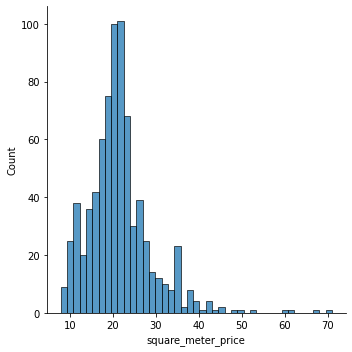

In [ ]:
# Let's see how the data looks like:
sns.displot(immoscout_rents["square_meter_price"])

# There seem to be appartments available below our affordable threshold, but there is no way to tell if there is a shortage.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


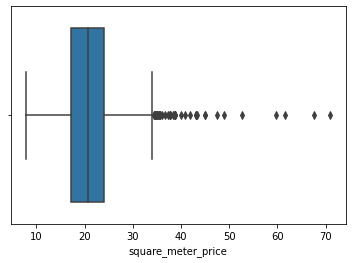

In [ ]:
# How are the values distributed?
sns.boxplot(immoscout_rents["square_meter_price"])

# We need to add the threshold value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


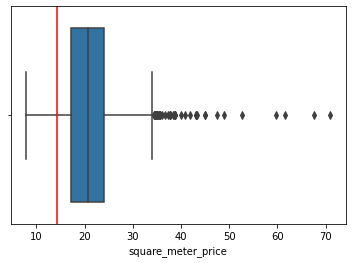

In [ ]:
# Let's add the threshold to this graph:
g = sns.boxplot(immoscout_rents["square_meter_price"])
g.axvline(14.25, c="red")

# we can see from the red line that the first quartile lies above our affordability threshold.

In [ ]:
# Let's confirm this by using a quantile function:
immoscout_rents["square_meter_price"].quantile(0.25)

# Boolean test:
do_we_have_shortage = immoscout_rents["square_meter_price"].quantile(0.25) > 14.25
print(f"do_we_have_shortage: {do_we_have_shortage}")

do_we_have_shortage: True


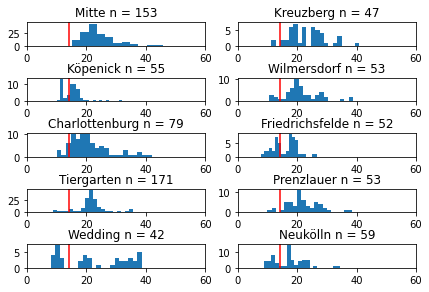

In [ ]:
# Let's see if this happens in all of Berlin's districts.

# Let's create a grid of subplots.

fig, axs = plt.subplots(5, 2)
fig.tight_layout()

for i, region in enumerate(immoscout_rents["Region"].unique()):
  axs[i // 2 , i % 2].set_title(f"{region} n = {len(immoscout_rents[immoscout_rents['Region'] == region])}")
  axs[i // 2 , i % 2].hist(immoscout_rents[immoscout_rents["Region"] == region]["square_meter_price"], bins=20)
  axs[i // 2 , i % 2].axvline(14.25, color="red")
  axs[i // 2 , i % 2].set_xlim([0, 60])

# These graphs show that there are clearly some big differences across different 
# neighbourhoods. E.g. Charlottenburg or Mitte appear to be leaning to higher rents 
# while Wedding seems to be on the less expensive side.

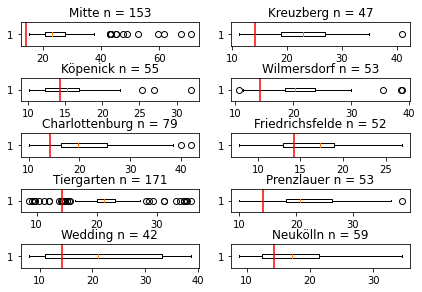

In [ ]:
# Let's check the value distribution:
fig, axs = plt.subplots(5, 2)
fig.tight_layout()

for i, region in enumerate(immoscout_rents["Region"].unique()):
  axs[i // 2 , i % 2].set_title(f"{region} n = {len(immoscout_rents[immoscout_rents['Region'] == region])}")
  axs[i // 2 , i % 2].boxplot(immoscout_rents[immoscout_rents["Region"] == region]["square_meter_price"], vert=False)
  axs[i // 2 , i % 2].axvline(14.25, color="red")

# A few regions have a quartile price that lies below our threshold. These are Köpenick, 
# Wedding, Friedrichsfelde and Neukölln. These also have fewer appartments
# available in absolute numbers. Also, the affordability threshold in these four neighborhoods 
# always lies in the lower half of the first quartile. 

## Conclusion
---
Based on our assumptions and the data available to us, we can conclude the following:

Looking at Berlin as a whole, there seems to be a shortage of affordable rents.

Looking at each neighborhood in part, some neighborhoods have a more affordable rent distribution. However, only four out of ten analyzed neighborhoods show this slight tendency, and they do not make up for the overall shortage observed in Berlin.